In [ ]:
#| default_exp InsuranceAI
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#| hide
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from InsuranceAI.utils import read_data, select_variables


# InsuranceAI

> Testing for Asymmetric Information in Insurance with Deep Learning

We read the data and we convert the variables to their correct types:

In [ ]:
data88 = read_data("j88")

## selecting  variables
We will work with a subset of the variables. Our endogeneous variables will be `Comprehensive coverage` for the choice of contract $y_1$ and `Not at fault` for the occurrence of a claim at fault $y_2$.
We also use the variable `Duration` to weight the observations, and 9 categorical covariates.

In [ ]:
#| echo: false
y1, y2, w, X = select_variables(data88)

In [ ]:
#| echo: false
X.describe()

,Group,Male,Occupation,Region,Renault,Age category car,Age category insuree,Car use,Zone
count,6333,6333,6333,6333,6333,6333,6333,6333,6333
unique,6,2,8,10,2,12,9,4,5
top,3,1,2,5,0,11,1,2,6
freq,1272,3971,2865,1019,5046,1100,1354,2876,2626


In [ ]:
#| echo: false
lhs_vars = pd.DataFrame({
    'Comprehensive coverage': y1, 
    'Claim at fault': y2, 'Duration': w
})
lhs_vars.describe()


,Comprehensive coverage,Claim at fault,Duration
count,6333.000000,6333.000000,6333.000000
mean,0.368704,0.068530,0.630466
std,0.482491,0.252673,0.338334
min,0.000000,0.000000,0.002740
25%,0.000000,0.000000,0.304110
50%,0.000000,0.000000,0.657534
75%,1.000000,0.000000,0.997260
max,1.000000,1.000000,0.997260


The matrix of $(y_1,y_2)$ is as follows:

In [ ]:
#| echo: false
pd.crosstab(lhs_vars['Comprehensive coverage'], lhs_vars['Claim at fault'])

Claim at fault,0,1
Comprehensive coverage,,
0,3696,302
1,2203,132


<IPython.core.display.Javascript object>


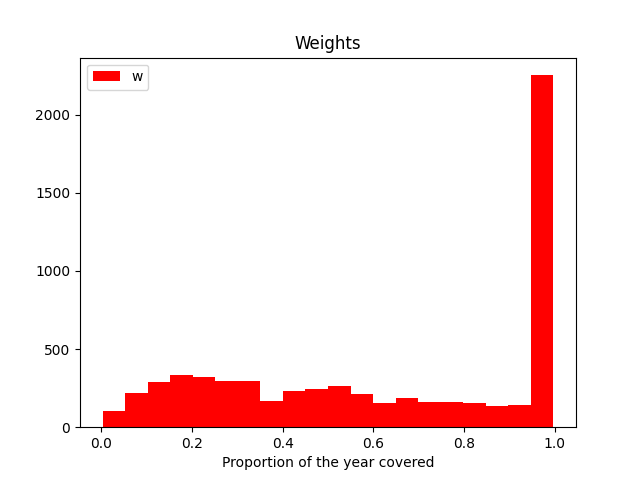

In [ ]:
#| echo: false
fig, ax = plt.subplots()
ax.hist(w, color='red', label='w', bins=20)
ax.set(xlabel="Proportion of the year covered", title="Weights")
ax.legend()
plt.show()



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(1, activation="sigmoid", input_dim=9),
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(X.values[:3200,:], y1.values[:3200],epochs=5, batch_size=128)

Epoch 1/5
25/25 [==============================] - 0s 481us/step - loss: 0.7339 - accuracy: 0.7384
Epoch 2/5
25/25 [==============================] - 0s 448us/step - loss: 0.7030 - accuracy: 0.7325
Epoch 3/5
25/25 [==============================] - 0s 449us/step - loss: 0.6875 - accuracy: 0.7306
Epoch 4/5
25/25 [==============================] - 0s 440us/step - loss: 0.6753 - accuracy: 0.7284
Epoch 5/5
25/25 [==============================] - 0s 411us/step - loss: 0.6635 - accuracy: 0.7306


<keras.callbacks.History>

In [ ]:
#| hide
import nbdev;nbdev.nbdev_export()